# <span style='color:green'>Cross Validation in Machine Learning</span>
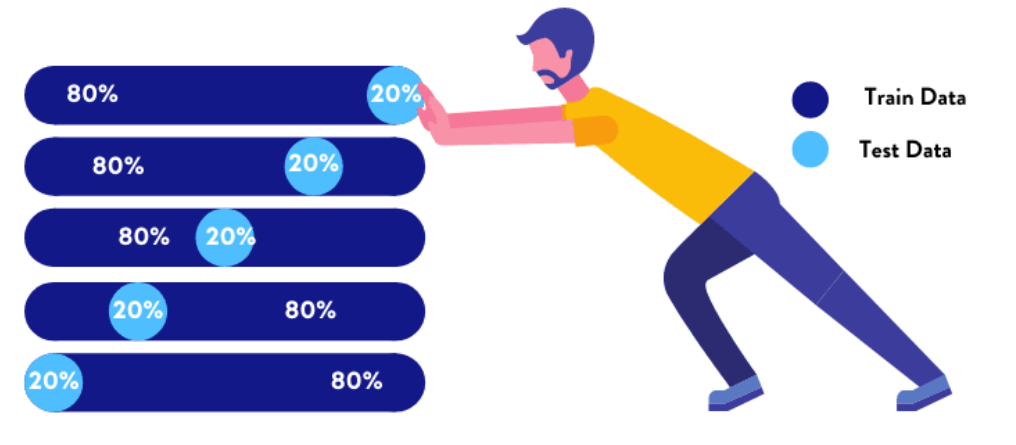
- **Definition**: Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.
- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation


## <span style='color:red'>1. Why is cross validation needed?</span>
- Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters of your model, in the sense that which parameters will result in lowest test error.


## <span style='color:red'>2. How do you use cross validation?</span>
    1. Divide the dataset into two parts: one for training, other for testing.
    2. Train the model on the training set.
    3. Validate the model on the test set.
    4. Repeat 1-3 steps a couple of times. This number depends on the CV method that you are using.
    
## <span style='color:red'>3. What is one advantage of using cross-validation?</span>
- Advantages of cross-validation: More accurate estimate of out-of-sample accuracy. More “efficient” use of data as every observation is used for both training and testing.

## <span style='color:red'>4. Why is validation important in machine learning?</span>
- Validating the machine learning model outputs are important to ensure its accuracy. When a machine learning model is trained, a huge amount of training data is used and the main aim of checking the model validation provides an opportunity for machine learning engineers to improve the data quality and quantity.

## <span style='color:red'>5. How does cross-validation improve accuracy?</span>
- This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error

## <span style='color:red'>6. What is the main disadvantage of cross-validation?
- The disadvantage of this method is that the training algorithm has to be rerun from scratch k times, which means it takes k times as much computation to make an evaluation. A variant of this method is to randomly divide the data into a test and training set k different times.


# <span style='color:red'>7. What are the different types of cross-validation?
- <span style='color:green'>4 Types of Cross Validation
    1. Holdout Method.
    2. K-Fold Cross-Validation.
    3. Stratified K-Fold Cross-Validation.
    4. Leave- One-Out Cross-Validation.

# <span style='color:gray'> Let's discuss one by one:- 
## <span style='color:red'>1. Holdout Method
 - simplest kind of cross-validation
 - we randomly divide our data into two: Training and Test/Validation set i.e. a hold-out set.
 - The model evaluation techniques used on the validation dataset to compute the error depends on the kind of problem we are working with such as MSE being used for Regression problems while various metrics providing with the misclassification rate helping in finding the error for classification problems.
 - Typically the training dataset is bigger than the hold-out dataset.
 - This method is only used when we only have one model to evaluate and no hyper-parameters to tune.
 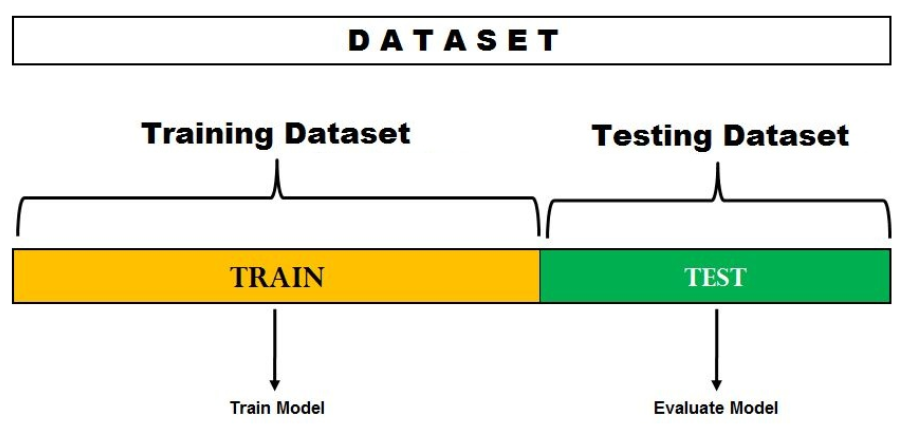

In [1]:
# let's understand with code
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('../input/bank-churn-data/Bank Churn Data.csv')

In [3]:
# df.drop(columns='Unnamed: 0',inplace=True)
df.sample(2)

,Unnamed: 0,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Exited
2752,2752,698,0,31,8,185078.26,1,0,0,115337.74,0,1,1
711,711,634,1,35,6,116269.01,1,1,0,129964.94,1,0,0


In [4]:
X = df.drop(columns='Exited')
y = df['Exited']

- Here we give X and y data, test_size(0.2 means 20%) and random_state(try any no on which get best result)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
# selecting model to perform validation
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [7]:
y_pred= lor.predict(X_test)

In [8]:
y_pred # predicted result

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
np.array(y_test) # actual result

array([0, 1, 0, ..., 0, 0, 0])

In [10]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score of Model: ", '{:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy Score of Model:  78.90%


## <span style='color:red'>2. K-fold Cross Validation
- The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

### What is k fold ?
- K - Fold CV is where we divide our data set into k time i.e for eg we have a data set of 100 and we set a value a of k as 5. So our data set will get split  into 5 folds. 
    1. Out of 100, our first 20 will be test-data-set and 80 will be training data-set
    2. The next 20 i.e(41-60) will be our test-data-set and rest will be training data-set
    3. The next 20 i.e(61-80) will be our test-data-set and rest will be training data-set
    4. The next 20 i.e(81-100) will be our test-data-set and rest will be training data-set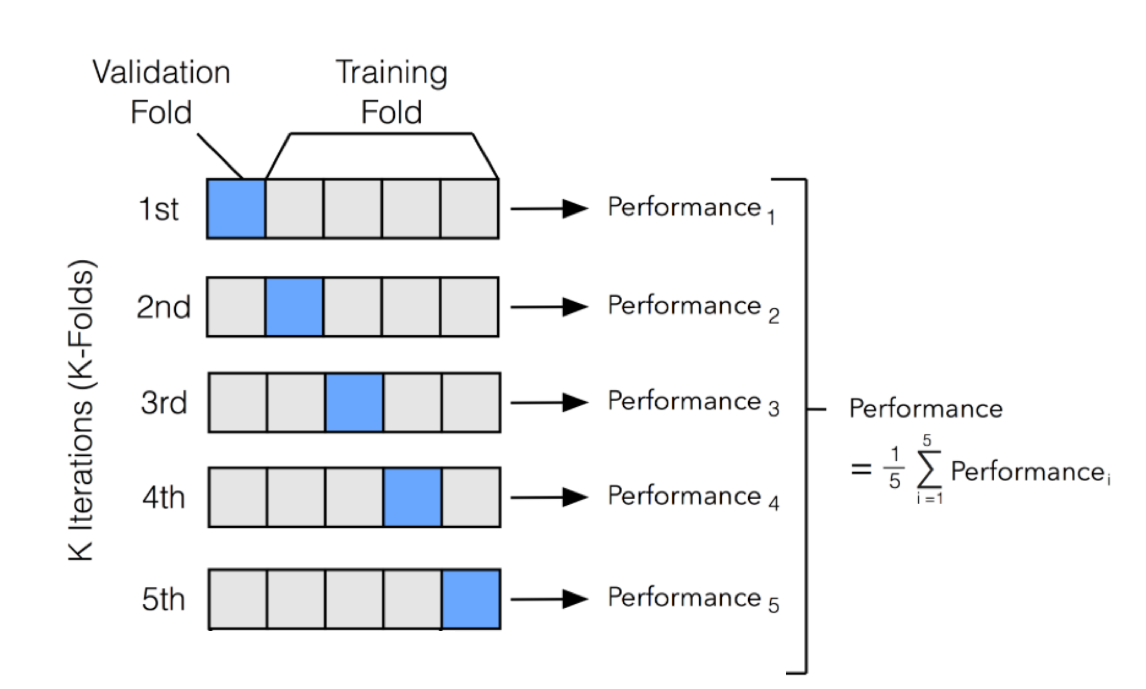

### The general procedure is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

## Let's understand with code

In [11]:
from sklearn.model_selection import KFold,cross_val_score
kfold_validation = KFold(10) # init the no of k

In [12]:
results=cross_val_score(lor,X,y,cv=kfold_validation)
print('10 results for each data split: ',results)
print('Avg Accuracy of model: ','{:.2f}%'.format(np.mean(results)*100))

10 results for each data split:  [0.785 0.786 0.775 0.779 0.789 0.794 0.796 0.792 0.781 0.81 ]
Avg Accuracy of model:  78.87%


- as k=10, we get 10 results for each data splits, now calculate the mean of all result that will be the final result or average result.
- This is how K-fold CV works
- DisAdv-
    1. Here we can't see the actual predicted result
    2. we cannot apply confusion,recall,precissiom metrices
    3. Chances of getting selected only one type of class in test data in test set, as it is randomly selected (to overcome this problem we use Stratified K-Fold CV)

## <span style='color:red'>3. Stratified K-Fold Cross-Validation.
 - Best CV for imbalanced dataset
 - It ensure that the no of intences of each class taken for each training set in proper balance  
 - Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold  cross-validation, it does stratified sampling instead of random sampling. 


In [13]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

In [14]:
scores=cross_val_score(lor,X,y,cv=skfold)
print('5 results for each train test set: ',scores)
print("Average Result : ",np.mean(scores))

5 results for each train test set:  [0.7845 0.7865 0.79   0.7965 0.789 ]
Average Result :  0.7893


## <span style='color:red'>4. Leave-One-Out Cross-Validation(LOOCV).
- It takes one point as test and remaining as train and same repeated until last 
- It is old technique, takes long time(as it repeat for every point(row) of data)
- Not used long data set

In [15]:
from sklearn.model_selection import LeaveOneOut
leave_validation=LeaveOneOut()
results=cross_val_score(lor,X.iloc[:100,],y.iloc[:100,],cv=leave_validation) # only giving 100 rows of data to predict fast
print(results)
print(len(results))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
100


- Here we get 100 output results for each points

- This is how cross validation works
## <span style='color:green'>Thanks!!
### <span style='color:green'>Pls upvote if this is informative for you
### <span style='color:green'>Feel free to drop views/suggestions in comments